# Part II - (Prosper Loan Dataset Analysis Outcome)
## by (Clinton Nwokocha)



## Investigation Overview

> The goals of this presentation is to outline features that iunfluence the borrower APR for each loan taken. 

## Dataset Overview
The data is the Prosperloan dataset generated by the p2p lending industry based in Carlifornia, Properloan Marketplace, inc.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#disable settings to copy warning
pd.options.mode.chained_assignment = None

In [2]:
# load dataset into pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# load statistics of data
print(loan.shape)
loan.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### There are 81 columns heres, with a large chunk of them, containg null values, with a wide range of datatypes, The number of rows is 113937

In [4]:
# See basic statistics details of each column
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### The listing category have numeric values, to make the values more understadable, a list of corresponding words that could give more meaning to the listing category

### What is the structure of your dataset?

> There 113,937 loan applications with 81 different features for each of them

### What is/are the main feature(s) of interest in your dataset?

> 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The Occupation, Employment Status, income range, listing category, debt to income ratio

In [6]:
# Selecting features that are relevant to the analysis I would be making
columns = ['ListingKey','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate','EmploymentStatus','ListingCategory (numeric)', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange', 
           'IncomeVerifiable', 'Occupation', 'LoanOriginalAmount']
loan_df = loan[columns]

In [7]:
# Check information of the sub dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   EmploymentStatus           111682 non-null  object 
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   IncomeRange                113937 non-null  object 
 10  IncomeVerifiable           113937 non-null  bool   
 11  Occupation                 110349 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
dtypes: bool(2), float64(3), int64

In [8]:
# assigning the values of the listing category (numeric) with more descriptive values
category ={0: 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 
 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 
 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].map(category)

# Modifying the name of the column
loan_df = loan_df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'})

In [9]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   Term                 113937 non-null  int64  
 2   LoanStatus           113937 non-null  object 
 3   BorrowerAPR          113912 non-null  float64
 4   BorrowerRate         113937 non-null  float64
 5   EmploymentStatus     111682 non-null  object 
 6   ListingCategory      113937 non-null  object 
 7   IsBorrowerHomeowner  113937 non-null  bool   
 8   DebtToIncomeRatio    105383 non-null  float64
 9   IncomeRange          113937 non-null  object 
 10  IncomeVerifiable     113937 non-null  bool   
 11  Occupation           110349 non-null  object 
 12  LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 9.8+ MB


### Filling in missing values

In [10]:
# get the mean and mode of variables with missing values 
mode_employment_status = loan_df['EmploymentStatus'].mode()[0]
mode_occupation = loan_df['Occupation'].mode()[0]
mean_debt_to_income_ratio = round(loan_df['DebtToIncomeRatio'].mean(), 2)
mean_apr = round(loan_df['BorrowerAPR'].mean(), 2)

In [11]:
#  fill in midding vaalues
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].fillna(mode_employment_status)
loan_df['Occupation'] = loan_df['Occupation'].fillna(mode_occupation)
loan_df['DebtToIncomeRatio'] = loan_df['DebtToIncomeRatio'].fillna(mean_debt_to_income_ratio)
loan_df['BorrowerAPR'] = loan_df['BorrowerAPR'].fillna(mean_apr)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   Term                 113937 non-null  int64  
 2   LoanStatus           113937 non-null  object 
 3   BorrowerAPR          113937 non-null  float64
 4   BorrowerRate         113937 non-null  float64
 5   EmploymentStatus     113937 non-null  object 
 6   ListingCategory      113937 non-null  object 
 7   IsBorrowerHomeowner  113937 non-null  bool   
 8   DebtToIncomeRatio    113937 non-null  float64
 9   IncomeRange          113937 non-null  object 
 10  IncomeVerifiable     113937 non-null  bool   
 11  Occupation           113937 non-null  object 
 12  LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 9.8+ MB


### What is the structure of your dataset?

> There 113,937 loan applications with 81 different features for each of them

### What is/are the main feature(s) of interest in your dataset?

> My main fearture is the Annual Percentage Rate which is housed in the BorrowerAPR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Other features such as the BorrowerRate, Occupation, Employment Status, income range, listing category, debt to income ratio seems to be interested and would guide me through the investigation.

## Univariate Exploration


###  looking at the main variable of interest: Borrower Annual Perecentage Rate, Is the distribution skewed or symmetric? Is it unimodal or multimodal?

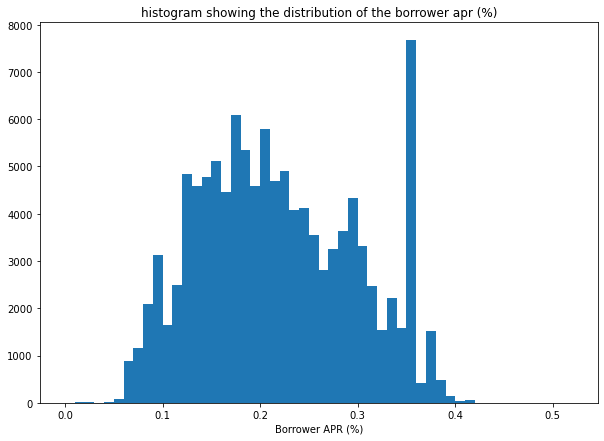

In [12]:
# Chart showing the distribution of The Borrower Annual Percentage Rate
plt.figure(figsize=[10,7])
plt.hist(data=loan_df, x='BorrowerAPR', bins = np.arange(0, loan_df['BorrowerAPR'].max()+0.01,0.01))
plt.xlabel('Borrower APR (%)')
plt.title('histogram showing the distribution of the borrower apr (%)');

####  The borrower APR is showing a multimodal distribution which could indicate that the data could be coming from several different sub population, other features in the dataset could tell how much of a sub population we are looking at here.

### The borrower rate which is the interest rate is a major chunk of what makes up the annual percentage rate, looking at its values would give out how much difference at what amount is the other chunk

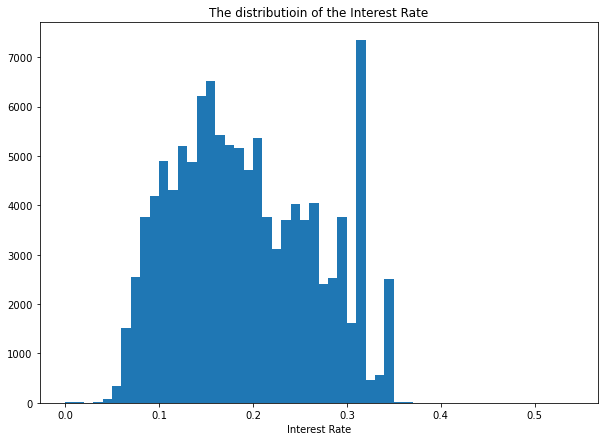

In [13]:
# Chart showing the distribution of The Interest Rate

plt.figure(figsize=[10,7])
plt.hist(data=loan_df, x='BorrowerRate', bins = np.arange(0, loan_df['BorrowerRate'].max()+0.05,0.01))
plt.xlabel('Interest Rate')
plt.title('The distributioin of the Interest Rate');

##### The chart of the interest rate looks very similar to that of the annual perecentage rate, this tells us that other rates are infinitesimal compared to the interest rate

### The term feature gives out the duration of these loans in months, is there an interesting pattern in these feature? 

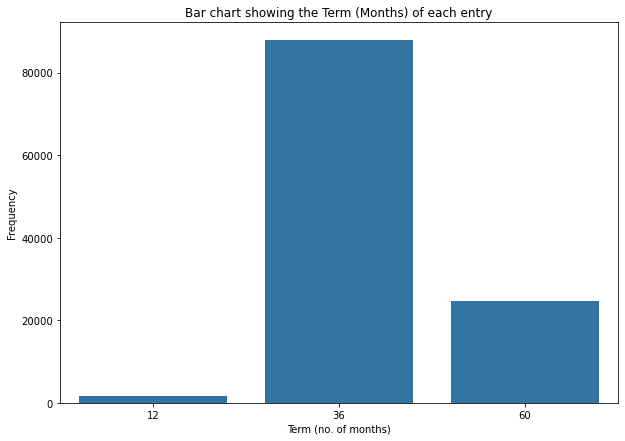

In [14]:
# Chart to visualize the Term feature
plt.figure(figsize = [10,7])
base_color= sns.color_palette()[0]
sns.countplot(data=loan_df, x='Term', color=base_color);
plt.xlabel('Term (no. of months)')
plt.ylabel('Frequency')
plt.title('Bar chart showing the Term (Months) of each entry');

### It is noticed that most of the loans were for a duration of 36 months, with just few being for 12months

## What were the reasons for the loans?

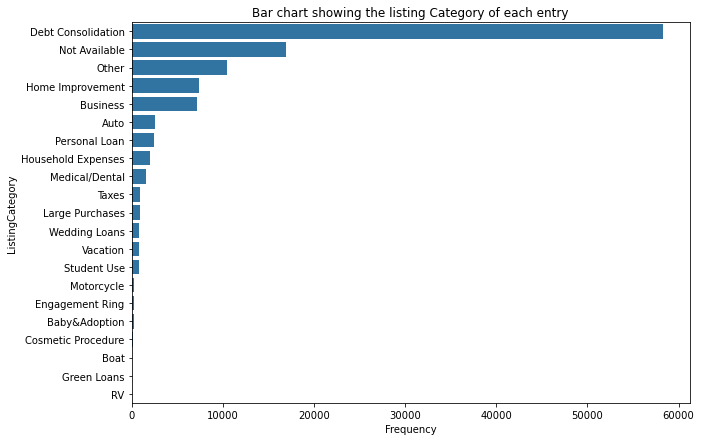

In [15]:
# Chart to visualize the listing Category feature
plt.figure(figsize = [10,7])
base_color= sns.color_palette()[0]
count_order = loan_df['ListingCategory'].value_counts().index
sns.countplot(data=loan_df, y='ListingCategory', color=base_color, order=count_order);
plt.xlabel('Frequency')
plt.ylabel('ListingCategory')
plt.title('Bar chart showing the listing Category of each entry');

#### The loans were taking majorly to pay off debts,

#### whats the distribution of the loan amount like?

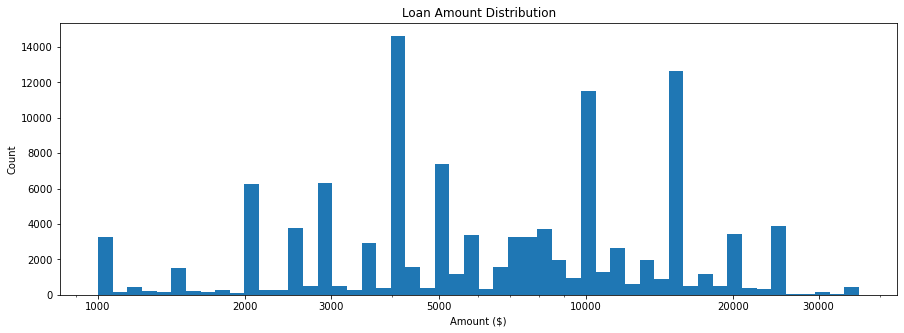

In [16]:
# looking at the distribution of the loan amount

bins = 10 ** np.arange(3, np.log10(loan_df['LoanOriginalAmount'].max())+0.03, 0.03)

plt.figure(figsize = [15, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins);

ticks = [1000,2000,3000,5000,10000,20000,30000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')
plt.xticks(ticks, labels);

### The loan amount is multi modal and widely distributed supporting earlier observtations that the data comes from several different sub population

### exploring the loan status would give us a report on the the distribution of loan standing in the dataset loan standing

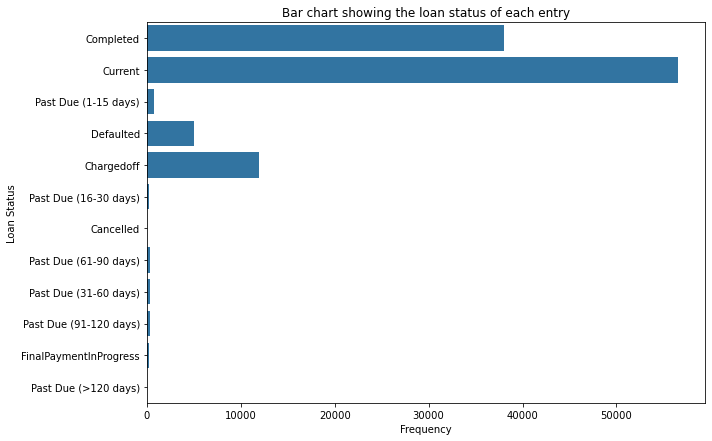

In [17]:
# Chart to visualize the loan status feature
plt.figure(figsize = [10,7])
base_color= sns.color_palette()[0]
sns.countplot(data=loan_df, y='LoanStatus', color=base_color);
plt.xlabel('Frequency')
plt.ylabel('Loan Status')
plt.title('Bar chart showing the loan status of each entry');

### The active and completed loans takes most points of the dataset

## The Ocuppation feature tell the occupation of individuals for each entry, whats the  occupation of most people in the entry?

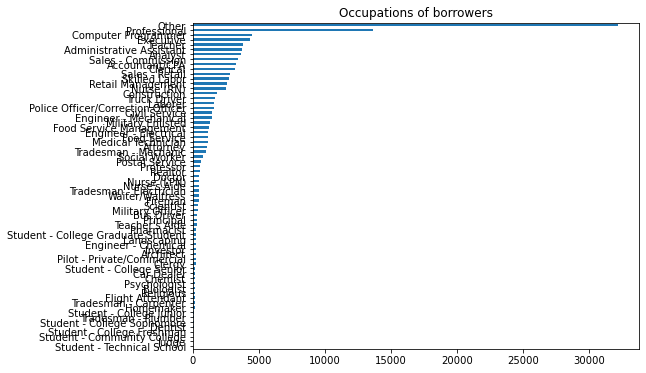

In [18]:
plt.figure(figsize=[8,6])
sort_y = loan_df['Occupation'].value_counts()
ax = sort_y.plot.barh()
ax.invert_yaxis()
ax.set_title('Occupations of borrowers');

The large number of unique values in this feauture makes it messy to look at it, checking to see the top ten would give us a better visual of the data

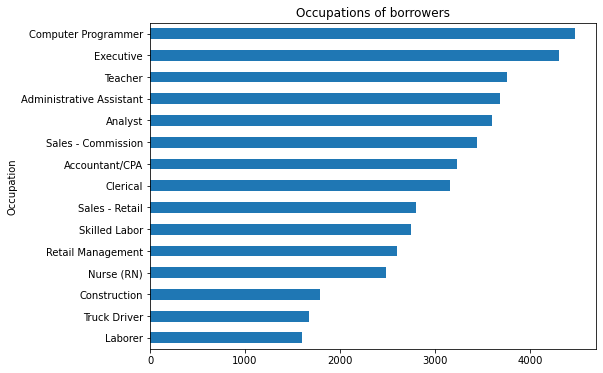

In [19]:
# check the top 15 occupations of borrowers excluding the unknown occupations, i.e Other and Professional
plt.figure(figsize=[8,6])
sort_y = loan_df['Occupation'].value_counts()
ax = sort_y.iloc[2:17].plot.barh()
ax.set_ylabel('Occupation')
ax.invert_yaxis()
ax.set_title('Occupations of borrowers');

### The occupation is widely distributed 

## The Employment status feature tells the status of each individual during the listing, 

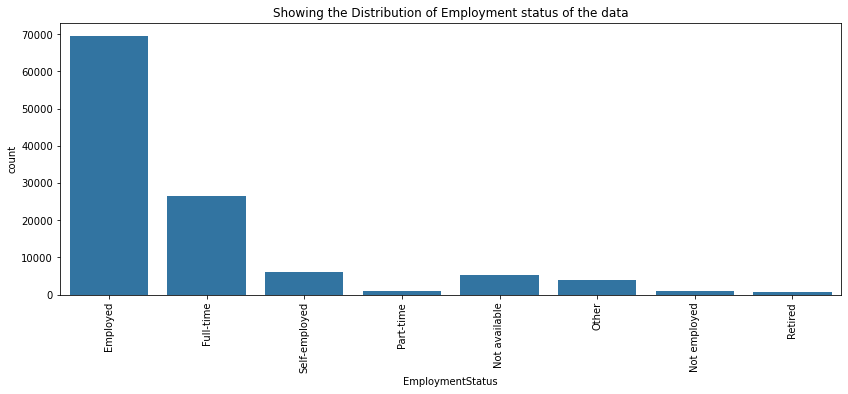

In [20]:
# The employment status plot

plt.figure(figsize=[14,5])

# order the Employment Status values for plotting
categories = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Not available', 'Other','Not employed', 'Retired']

loan_df['EmploymentStatus'] = pd.Categorical(loan_df['EmploymentStatus'], categories= categories,
                                   ordered = True)
sns.countplot(data=loan_df, x='EmploymentStatus', color=base_color);
plt.title('Showing the Distribution of Employment status of the data')
plt.xticks(rotation=90);

### From the above plot it is observed that most borrowers are employed, this could be based on the reasoning that income earners are more likely to finance their loan repayment using their monthly incomes. The not employed and retireed rarely features in this dataset.

## What is the distribution of the Debt to Income ratio of the entries in the datat set?

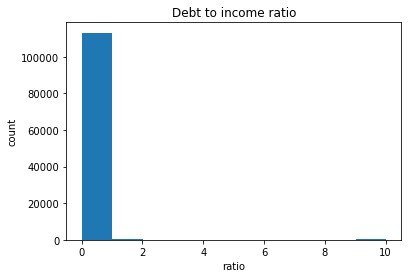

In [21]:
plt.hist(data=loan_df, x='DebtToIncomeRatio');
plt.title('Debt to income ratio');
plt.xlabel('ratio')
plt.ylabel('count');

### This plot shows there is an outlier somewhere around the value 10, some scale transformation needs to be done for better representatiomn of the data

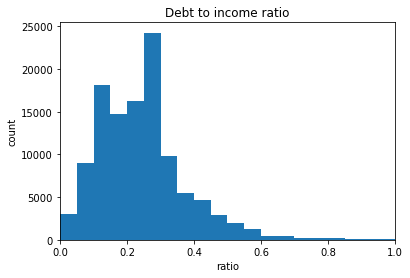

In [22]:
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.05,0.05)

plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins);
plt.xlim(0,1)
plt.title('Debt to income ratio')
plt.xlabel('ratio')
plt.ylabel('count');

### The plots shows a right skewd distribution,its a bimodal distribution with most of the debt to income ratio values falling between 0.1-0.4

### Visualizing the income range to see if there are interesting patterns

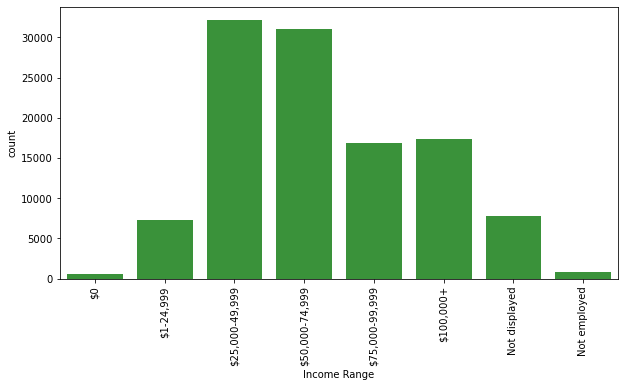

In [23]:
# order the income range values for plotting
loan_df['IncomeRange'] = pd.Categorical(loan_df['IncomeRange'], categories= ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+', 'Not displayed','Not employed'],
                                   ordered = True)
# bar chart showing te income rangeIncome range
plt.figure(figsize=(10,5))
default_color = sns.color_palette()[2]
sns.countplot(data=loan_df, x ='IncomeRange', color=default_color)
plt.xticks(rotation=90);
plt.xlabel('Income Range');

### It shows that most people that got loans were income earners, the not employed and non income earners were pooorly represented in the dataset.

### Check to observe what demographics of the dataset had required documents to support their investigations

Text(0.5, 1.0, 'Borrowers that indidcated they had required documents to support their investigations')

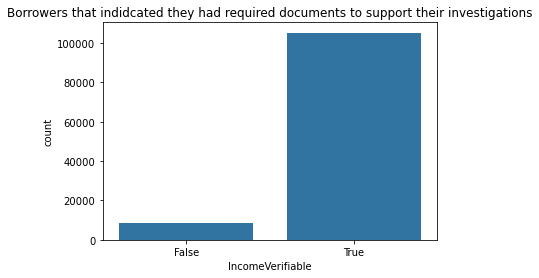

In [24]:
# Income verifiable plot

sns.countplot(data=loan_df, x='IncomeVerifiable', color=base_color)
plt.title('Borrowers that indidcated they had required documents to support their investigations')

### Most of the demographic were ready to provide required documents for proof of income.

### Check to observe what demographics of the dataset are home owners

<AxesSubplot:xlabel='IsBorrowerHomeowner', ylabel='count'>

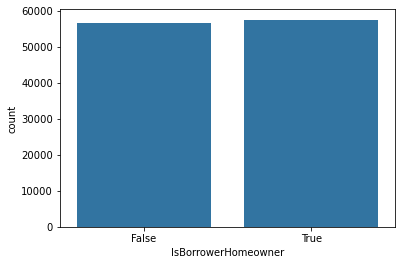

In [25]:
# Home Owner plot
sns.countplot(data=loan_df, x='IsBorrowerHomeowner', color=base_color)

#### There isnt a clear difference in this representation with the home owners only having a slight edge.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>   The borrower APR is showing a multimodal distribution which could indicate that the data could be coming from several different sub population, It also shows a very similar distribution to the Borrower Interest Rate which isn't far fetched since the interest rate is what normally makes up bulk part of the Annual Percentage Rate.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the features investigation, the debt to income ratio was highly skewd to the right so limits were set, to further understand the distribution better. The listing category had to be mapped with much more descriptive terms for better understand of their implications.

## Bivariate Exploration


## The borrower rate and borrower apr showed similar pattern as univariates, would there be any unusual distribution if both are plotted together on a chart?

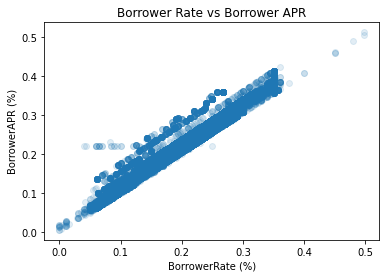

In [26]:
# Bivarate plot for the Interest Rate against the Annual Percentage Rate
plt.scatter(data=loan_df, x = 'BorrowerRate', y = 'BorrowerAPR', alpha=1/8)
plt.xlabel('BorrowerRate (%)')
plt.ylabel('BorrowerAPR (%)')
plt.title('Borrower Rate vs Borrower APR');

#### There is a positive correlation between the interest rate and annual percentage rate which confirms our earlier bias

## Checking if there was any influence on the borrower owning a home with the annual Percentage rate

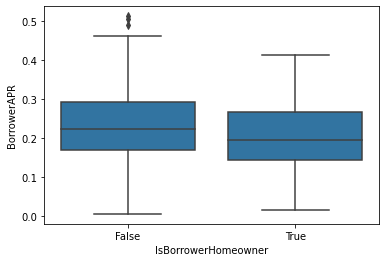

In [27]:
#Does home owners gets lower APR

sns.boxplot(data = loan_df, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',color = sns.color_palette()[0]);

#### The plot shows that Borrowers that own homes tend to have a lower borrower annual percentage rate, this has more to do with the confidence of the lenders, apparently you would be comfortable granting loans to people with assets.

## What impact does the lenght of the loan have on the Borrower Annual Percentage Rate

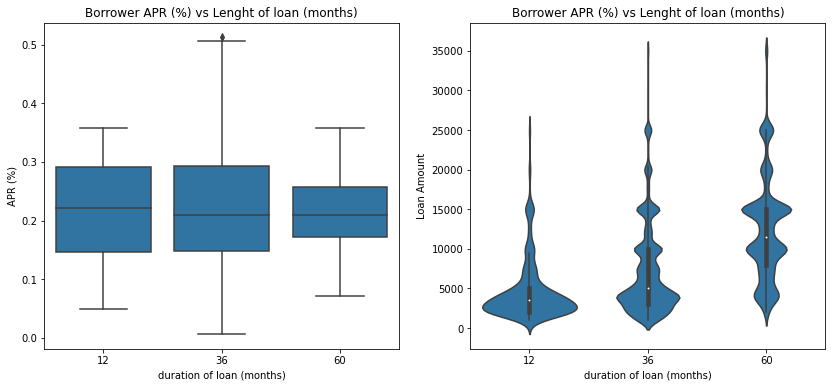

In [28]:
#Borrower APR vs Term
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.boxplot(data = loan_df, x = 'Term', y = 'BorrowerAPR', color=base_color)
plt.xlabel('duration of loan (months)')
plt.ylabel('APR (%)')
plt.title('Borrower APR (%) vs Lenght of loan (months)');


plt.subplot(1,2,2)
sns.violinplot(data = loan_df, x = 'Term', y = 'LoanOriginalAmount', color=base_color)
plt.xlabel('duration of loan (months)')
plt.ylabel('Loan Amount');
plt.title('Borrower APR (%) vs Lenght of loan (months)');

### The loans for the duration of 12 months seem to have a very slight average compared to those of 36 and 60 months, regardless the averages arent that very much

## What influence does the loan amount have on the duration of the loan

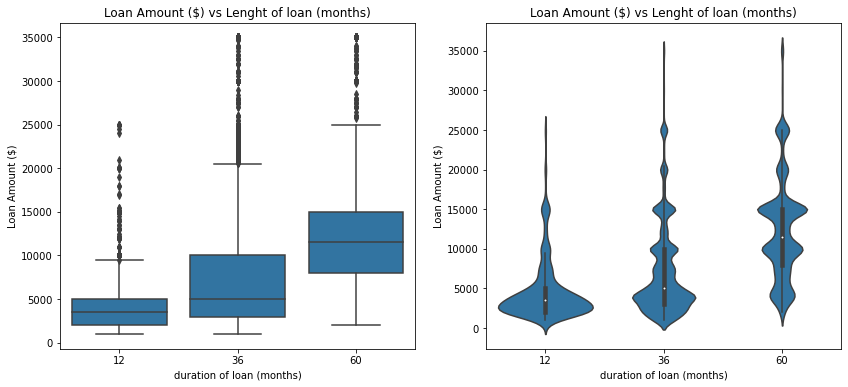

In [29]:
#Loan amount vs Term
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.boxplot(data = loan_df, x = 'Term', y = 'LoanOriginalAmount', color=base_color)
plt.xlabel('duration of loan (months)')
plt.ylabel('Loan Amount ($)');
plt.title('Loan Amount ($) vs Lenght of loan (months)');

plt.subplot(1,2,2)
sns.violinplot(data = loan_df, x = 'Term', y = 'LoanOriginalAmount', color=base_color)
plt.xlabel('duration of loan (months)')
plt.ylabel('Loan Amount ($)');
plt.title('Loan Amount ($) vs Lenght of loan (months)');

#### It is observed from this plot that the larger loans have longer durations

## Is there a relationship between term and employment Status

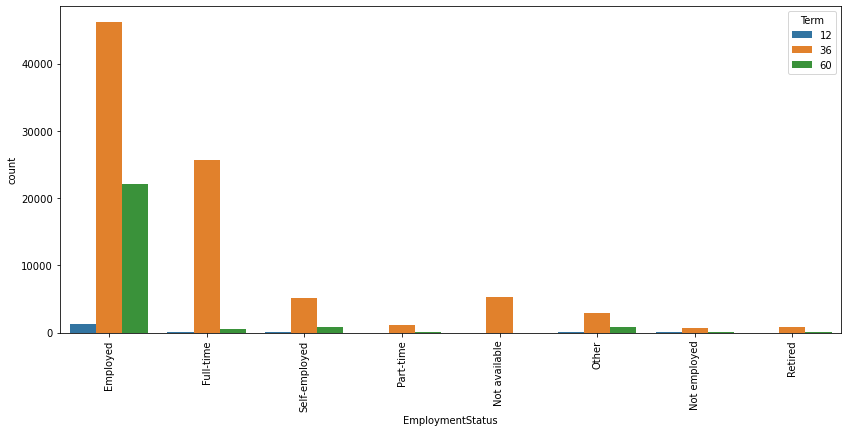

In [30]:
plt.figure(figsize=[14,6])
sns.countplot(data=loan_df, hue='Term', x='EmploymentStatus')
plt.xticks(rotation=90);

#### There is a similar pattern across all Employment status with respect to term where the 36 months is the most common duration, closely followed by the 60 months then the 12months.

## Whats the relationship between the borrower annual percentage and the debt to income ratio

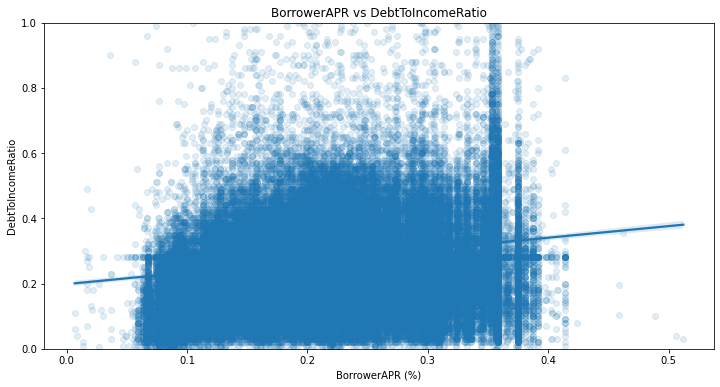

In [31]:
# Showing the relationshp between the APR and the debtoincome ratio
plt.figure(figsize=[12,6])
sns.regplot(data=loan_df, x='BorrowerAPR', y='DebtToIncomeRatio', scatter_kws={'alpha':1/8})
plt.ylim(0,1)
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('DebtToIncomeRatio')
plt.title('BorrowerAPR vs DebtToIncomeRatio');

#### From the plot it can be seen that the higher the Debt to Income Ratio, the higher the borrower annual percentage rate. Which means the more one is in debt, the more expensive it is to take loans

## Whats the relationship between the borrower annual percentage and the Loan Original amount

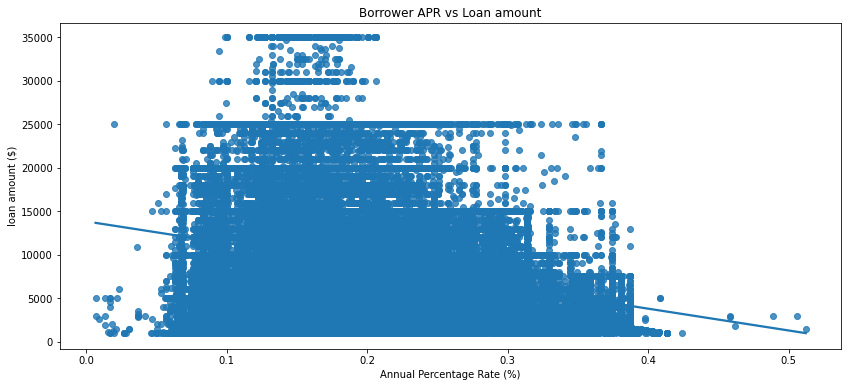

In [32]:
# plot to show the relationship between the borrower annual percentage rate and the loan amount
plt.figure(figsize=[14,6])

sns.regplot(data=loan_df, x='BorrowerAPR', y='LoanOriginalAmount')
plt.ylabel('loan amount ($)')
plt.xlabel('Annual Percentage Rate (%)')
plt.title('Borrower APR vs Loan amount');

#### There is a negative correlation between rthe loan amount and the annual percentage rate, the plot shows that lower loan amount attracts higher borrower APR

## Does the employment status of individual have implications on the borrower APR

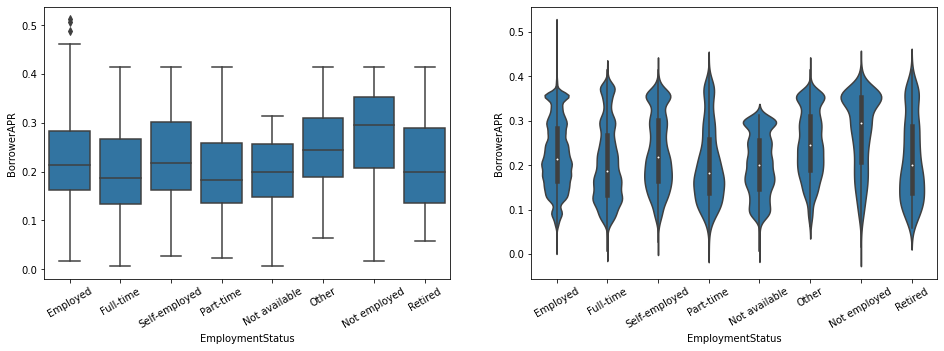

In [33]:
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.boxplot(data=loan_df, y = 'BorrowerAPR', x='EmploymentStatus', color=base_color);
plt.xticks(rotation=30);

plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.violinplot(data=loan_df, y = 'BorrowerAPR', x='EmploymentStatus', color=base_color);
plt.xticks(rotation=30);

#### People with jobs tends to have lower APR compared to those without one

## Does the Income Range of individual have implications on the Loan Amount?

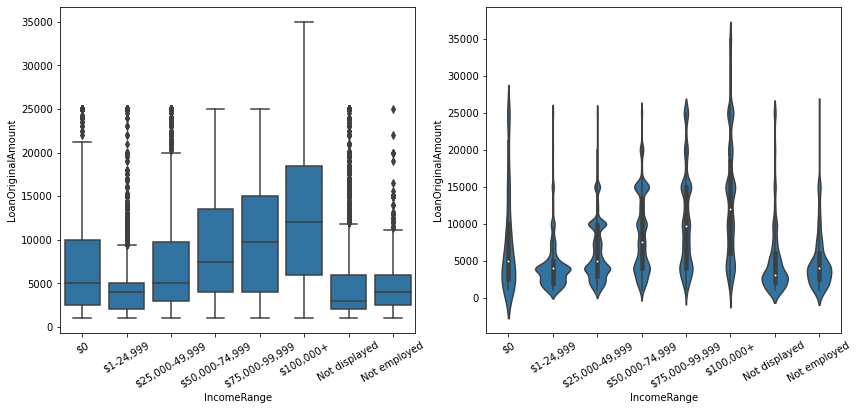

In [34]:
plt.figure(figsize=[14,6])
base_color = sns.color_palette()[0]

plt.subplot(1,2,1)
sns.boxplot(data=loan_df, y = 'LoanOriginalAmount', x='IncomeRange', color=base_color);
plt.xticks(rotation=30);

plt.subplot(1,2,2)
sns.violinplot(data=loan_df, y = 'LoanOriginalAmount', x='IncomeRange', color=base_color);
plt.xticks(rotation=30);

#### It can be observed from the above plot that the amount giving as loans increases with Income range, individuals that are not employed or earn less get low figures as loans

## Whats the influence of the Income Range on the borrower APR

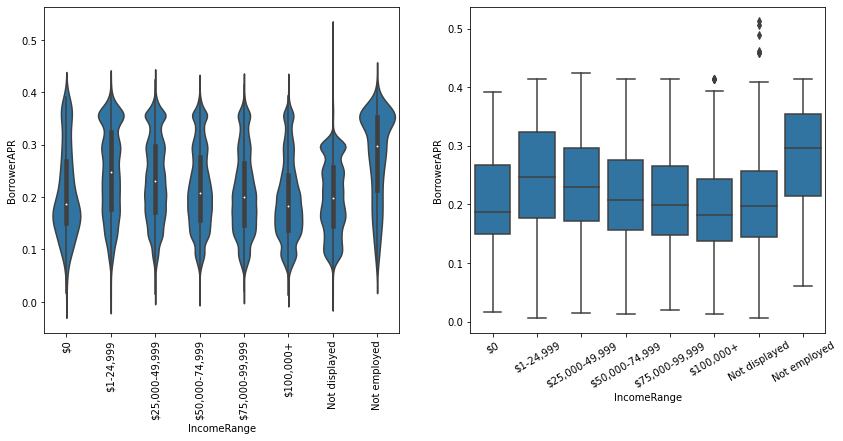

In [35]:
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sns.violinplot(data=loan_df, y = 'BorrowerAPR', x='IncomeRange', color=base_color);
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sns.boxplot(data=loan_df, y = 'BorrowerAPR', x='IncomeRange', color=base_color);
plt.xticks(rotation=30);

#### The borrower APR tends to be higher for the non employed and the low income earners, as income range increases, Borrower Annual Percentage rate reduces

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Its noticed that the debt to income ratio positively affects the borrower apr, while an increase in the loan amount reduces the Borrower APR. Individuals that are employed and with jobs tend to attract lower apr's too, so as the income range increases, the borrower APR decreases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, there are other relationships between other features; the loan amount and income range have a positive relation where its noticed that with an increase in income range the loan amount also increases, and the larger the amount of loan the term duration of the loan increases too.

## Multivariate Exploration


## In earlier analysis it was noticed that the income range influenced the borrower apr, is this influence uniform across the three duration?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


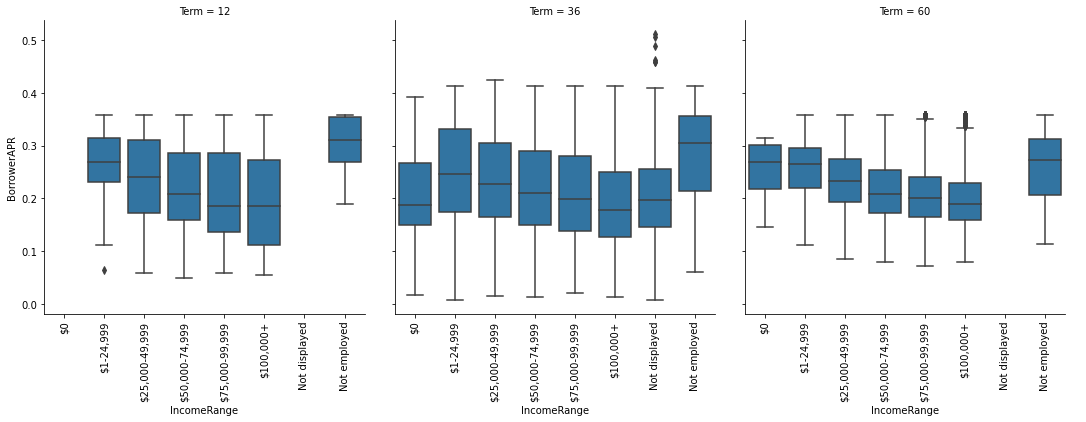

In [36]:
# multivariate plot of term by IncomeRAnge, and BorrowerAPR

g = sns.FacetGrid(data = loan_df, col='Term',col_wrap = 3, 
margin_titles=True, height=5);
g.map(sns.boxplot, 'IncomeRange',  'BorrowerAPR')
g.add_legend();
g.set_xticklabels(rotation=90);

#### From the above plot it a similar pattern can be observed across all three terms, there is a sharp decrease in the Borrower APR with an Increase in Income Range irregardless of the duration of the loan

## What is the influence of having a document to proof income on the Borrowerapr

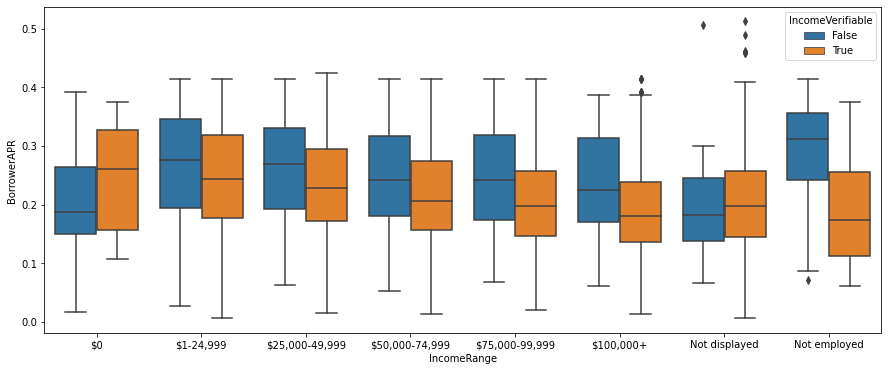

In [37]:
#Checking the relation between IncomeRange, BorrowerAPR and IncomeVerifiable
g = sns.boxplot(data=loan_df, x='IncomeRange', y='BorrowerAPR', hue='IncomeVerifiable');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

#### From the above plot it can be noticed that for each income range, those ready to provide required documents for proof of income had lower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Income Verifiable feature influenced the borrower Apr across income range, those that were ready to show proof of their income got favoured APR, even at instances where the boorrower is not employed this pattern is still noticed.
### Were there any interesting or surprising interactions between features?

> The very clear difference between incomeverifiable categories in the not employed class.

## Conclusions
> The explored features in the dataset revealed that the incomerange, loan amount, debt to income ratio and income verifiable influenced the Annual Percentage Rate attached to each loan entry and should be considered while applying for a loan next.